# Project-1
# Models for predicting Heart Disease

## Introduction

The general purpose of this project is to train and evaluate three different models that predict the **the risk of heart disease**. Particularly, I am interested in constructing the following three models: **decision tree classifier**, **knn classifier**, and **logistic regression**.

The analysis is made according to the dataset which originally came from CDC (Centers for Disease Control and Prevention). The original dataset contained information of more than 400k interviewed adults. The original dataset was very large, so, for the convenience and purpose of this project, I modified the dataset by removing some variables and reducing it to 10k observations.

Link to the original dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

## Methods

1. Removing unnecessary variables from the dataset.

2. Converting categorical features into numerical using dummy variables.

3. Using Random under-sampling because original dataset was imbalanced.

4. Choosing **HeartDisease** as an output variable and **AlcoholDrinking**, **Stroke**, **DiffWalking**, **PhysicalActivity**, **Smoking** as feature variables.

5. Training and evaluating the following three models: **decision tree classifier**, **knn classifier**, **logistic regression**.


### Loading dataset and removing unnecessary variables

In [220]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_excel('heart_2020_cleaned_modified.xlsx')
del df['Sex']
del df['Race']
del df['Diabetic']
del df['AgeCategory']

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,SleepTime
0,No,16.60,Yes,No,No,No,Yes,5
1,No,26.58,Yes,No,No,No,Yes,8
2,No,24.21,No,No,No,No,No,6
3,No,23.71,No,No,No,Yes,Yes,8
4,Yes,28.87,Yes,No,No,Yes,No,12


### Converting into numerical variables

In [221]:
df = pd.get_dummies(df)

### Checking if the dataset is imbalanced

In [222]:
class_count_0, class_count_1 = df['HeartDisease_Yes'].value_counts()

print(class_count_0)
print(class_count_1)

9055
945


### Random under-sampling

In [223]:
class_0 = df[df['HeartDisease_Yes'] == 0]
class_1 = df[df['HeartDisease_Yes'] == 1]

In [224]:
print(class_0.shape)
class_0.head()

(9055, 14)


,BMI,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,PhysicalActivity_No,PhysicalActivity_Yes
0,16.60,5,1,0,0,1,1,0,1,0,1,0,0,1
1,26.58,8,1,0,0,1,1,0,1,0,1,0,0,1
2,24.21,6,1,0,1,0,1,0,1,0,1,0,1,0
3,23.71,8,1,0,1,0,1,0,1,0,0,1,0,1
5,21.63,4,1,0,1,0,1,0,1,0,1,0,0,1


In [225]:
print(class_1.shape)
class_1.head()

(945, 14)


,BMI,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,PhysicalActivity_No,PhysicalActivity_Yes
4,28.87,12,0,1,0,1,1,0,1,0,0,1,1,0
9,34.30,15,0,1,0,1,1,0,1,0,0,1,1,0
29,32.98,4,0,1,0,1,1,0,0,1,0,1,0,1
35,25.06,7,0,1,1,0,1,0,1,0,0,1,1,0
37,20.37,10,0,1,0,1,1,0,1,0,1,0,1,0


total class of 1 and 0: 1    945
0    945
Name: HeartDisease_Yes, dtype: int64


<IPython.core.display.Javascript object>


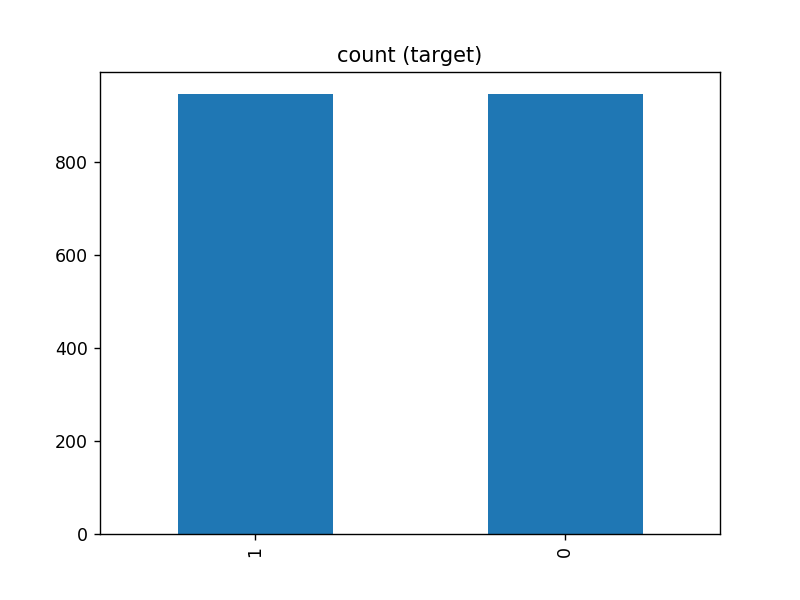

In [226]:
class_0_under = class_0.sample(class_count_1)

df_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",df_under['HeartDisease_Yes'].value_counts())# plot the count after under-sampeling
df_under['HeartDisease_Yes'].value_counts().plot(kind='bar', title='count (target)')

In [227]:
df_under

,BMI,SleepTime,HeartDisease_No,HeartDisease_Yes,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,PhysicalActivity_No,PhysicalActivity_Yes
9062,29.29,6,1,0,0,1,1,0,1,0,1,0,0,1
7933,20.97,9,1,0,1,0,1,0,1,0,0,1,0,1
3475,38.97,7,1,0,1,0,1,0,1,0,1,0,0,1
6,31.64,9,1,0,0,1,1,0,1,0,0,1,1,0
6773,24.28,7,1,0,0,1,1,0,1,0,1,0,0,1
8917,28.25,7,1,0,0,1,1,0,1,0,1,0,0,1
8295,27.26,8,1,0,1,0,1,0,1,0,1,0,0,1
1665,28.94,7,1,0,0,1,1,0,1,0,1,0,0,1
40,20.12,7,1,0,1,0,1,0,1,0,0,1,1,0
2284,30.79,6,1,0,1,0,1,0,1,0,1,0,0,1


### Choosing the output variable and feature variables

In [228]:
X = df_under.iloc[:, [5,7,9,11,12]]
y = df_under.iloc[:, 3]

In [229]:
X.head()

,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,PhysicalActivity_No
9062,1,0,0,0,0
7933,0,0,0,1,0
3475,0,0,0,0,0
6,1,0,0,1,1
6773,1,0,0,0,0


In [230]:
y.head()

9062    0
7933    0
3475    0
6       0
6773    0
Name: HeartDisease_Yes, dtype: uint8

### Splitting into the training and test dataset

In [231]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

## Analysis

In this section, I am going to analyze and evaluate three different models: DecisionTreeClassifier, KNeighborsClassifier, and LogisticRegression.

The evaluation metric I have chosen for this project is **ROC AUC score** think that it is the most suitable metric for the purpose ot this project. Since ROC AUC score shows the performance of the model at distinguishing between the positive and negative choices, which is what I try to achieve in this project.

When choosing the best model for the purpose of this project I will also focus my attention on Recall Score. Because I am interested in minimazing the value of False Negatives in this project.

### Training and evaluating Decision Tree Classifier

<IPython.core.display.Javascript object>


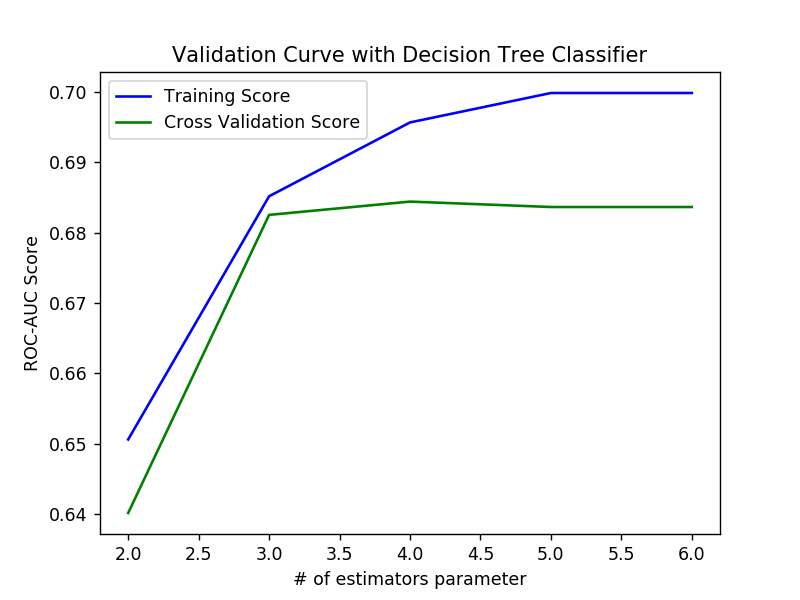

In [232]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve

parameters =  [2, 3, 4, 5, 6]

train_score, test_score = validation_curve(DecisionTreeClassifier(), X_train, y_train,
                                           param_name = "max_depth", 
                                           param_range = parameters,
                                           cv = 5,
                                           scoring = "roc_auc")

mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)

mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

plt.figure()
plt.plot(parameters, mean_train_score, label = "Training Score", color = 'b')
plt.plot(parameters, mean_test_score, label = "Cross Validation Score", color = 'g')
plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("# of estimators parameter")
plt.ylabel("ROC-AUC Score")
plt.legend()
plt.show()

In [233]:
clf = DecisionTreeClassifier()
parameters = {"max_depth":[2,3,4,5,6]}

model = GridSearchCV(clf, param_grid=parameters, scoring='roc_auc', cv = 5)
model.fit(X_train, y_train)
    
print('best parameters: ', model.best_params_)
print('best score: ', model.best_score_) 

best parameters:  {'max_depth': 4}
best score:  0.684384879526


In [234]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred), classification_report(y_test, y_pred))

[[204  31]
 [131 107]]              precision    recall  f1-score   support

          0       0.61      0.87      0.72       235
          1       0.78      0.45      0.57       238

avg / total       0.69      0.66      0.64       473



### Training and evaluating KNeighborsClassifier

<IPython.core.display.Javascript object>


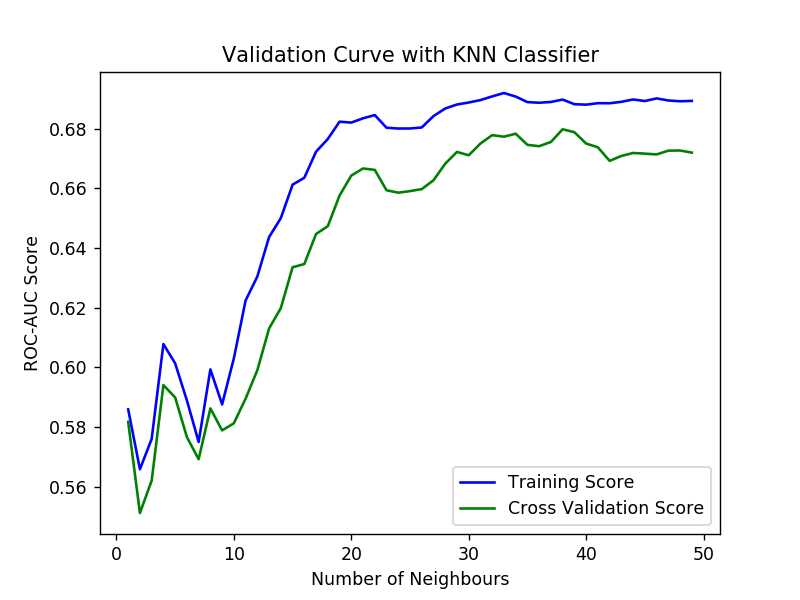

In [236]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import validation_curve

parameters = np.arange(1, 50, 1)
train_score, test_score = validation_curve(KNeighborsClassifier(), X_train, y_train,
                                           param_name = "n_neighbors", 
                                           param_range = parameters,
                                           cv = 5,
                                           scoring = "roc_auc")

mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)

mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

plt.figure()
plt.plot(parameters, mean_train_score, label = "Training Score", color = 'b')
plt.plot(parameters, mean_test_score, label = "Cross Validation Score", color = 'g')
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbours")
plt.ylabel("ROC-AUC Score")
plt.legend()
plt.show()

In [237]:
parameters={"n_neighbors":list(range(1,50))}

knn = KNeighborsClassifier()

model = GridSearchCV(knn, parameters, cv = 5, scoring = 'roc_auc')

knn_model = model.fit(X_train, y_train)

print("best parameters: ",knn_model.best_params_)
print("best score: ",knn_model.best_score_)

best parameters:  {'n_neighbors': 38}
best score:  0.67985020641


In [238]:
y_pred = knn_model.predict(X_test)
print(confusion_matrix(y_test, y_pred), classification_report(y_test, y_pred))

[[193  42]
 [132 106]]              precision    recall  f1-score   support

          0       0.59      0.82      0.69       235
          1       0.72      0.45      0.55       238

avg / total       0.66      0.63      0.62       473



### Training and evaluating LogisticRegression

<IPython.core.display.Javascript object>


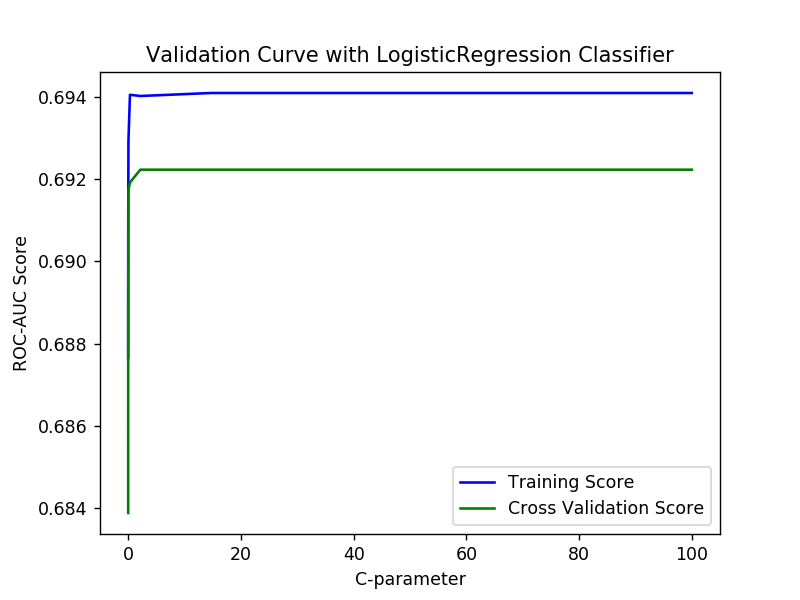

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve
# Setting the range for the parameter (from 1 to 10)
parameters = np.logspace(-3,2,7)

train_score, test_score = validation_curve(LogisticRegression(), X_train, y_train,
                                           param_name = "C", 
                                           param_range = parameters,
                                           cv = 5,
                                           scoring = "roc_auc")

mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)

mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

plt.figure()
plt.plot(parameters, mean_train_score, label = "Training Score", color = 'b')
plt.plot(parameters, mean_test_score, label = "Cross Validation Score", color = 'g')
plt.title("Validation Curve with LogisticRegression Classifier")
plt.xlabel("C-parameter")
plt.ylabel("ROC-AUC Score")
plt.legend()
plt.show()

In [241]:
parameters={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg, parameters, cv=5,scoring = 'roc_auc')
logreg_cv.fit(X_train,y_train)

print("best parameters: ",logreg_cv.best_params_)
print("best score :",logreg_cv.best_score_)

best parameters:  {'C': 0.10000000000000001, 'penalty': 'l2'}
best score : 0.692615962949


In [242]:
y_pred = logreg_cv.predict(X_test)
print(confusion_matrix(y_test, y_pred), classification_report(y_test, y_pred))

[[183  52]
 [108 130]]              precision    recall  f1-score   support

          0       0.63      0.78      0.70       235
          1       0.71      0.55      0.62       238

avg / total       0.67      0.66      0.66       473



## Conclusion

The main goal of this project was to train and evaluate three different models for predicting the heart disease from the dataset.

Before the analysis, the dataset was modified and randomly under-sampled in order to balance the data. Then, the output and feature models were chosen. After that, I choose ROC AUC score as my main evaluation metric, since it is the best at showing the performance of the model at distinguishing between the positive and negative choices. Also, when choosing the best model, I focused my attention at Recall score, since it is important metric that is related to False Negatives, which is important when dealing with medical diagnosis. In the analysis, all models were trained, evaluated and checked for overfitting or underfitting.

So after analyzing and evaluating three different methods. I can make a conclusion that Logistic Regression is the best model that predicts the risk of heart disease from given dataset. Since it has shown the highest roc auc score of 0.69 and the highest recall score of 0.55.

